In [1]:
import os
import pandas as pd

# Change this to your actual folder path
data_folder = r"C:\Users\asus\Downloads\health api"


nlp_files = ['note.csv.gz']

nlp_data = {}

# Load NLP files
for file in nlp_files:
    path = os.path.join(data_folder, file)
    if os.path.exists(path):
        nlp_data[file] = pd.read_csv(path, compression='gzip')
        print(f"✅ Loaded NLP file: {file} | Shape: {nlp_data[file].shape}")
    else:
        print(f"❌ Missing NLP file: {file}")
        

✅ Loaded NLP file: note.csv.gz | Shape: (24758, 8)


In [2]:
# View the first few rows
print(nlp_data['note.csv.gz'].head())

# Check column names
print(nlp_data['note.csv.gz'].columns)


    noteid  patientunitstayid  noteoffset  noteenteredoffset  \
0  3594780             157427           1                  8   
1  3594785             157427           1                  8   
2  3594786             157427           1                  8   
3  3594787             157427           1                  8   
4  3595514             238463          19                 22   

                 notetype                                           notepath  \
0  Comprehensive Progress  notes/Progress Notes/Admission Page One/Skip S...   
1  Comprehensive Progress  notes/Progress Notes/Assessment and Plan/View ...   
2  Comprehensive Progress  notes/Progress Notes/Assessment and Plan/Inclu...   
3  Comprehensive Progress  notes/Shared/View and Save/Save Options/Print/...   
4  Comprehensive Progress  notes/Progress Notes/Assessment and Plan/View ...   

                      notevalue                      notetext  
0  Include Past Medical History  Include Past Medical History  
1     

In [5]:
# Assume the text column is 'TEXT'
nlp_data['note.csv.gz']['clean_text'] = (
    nlp_data['note.csv.gz']['notetext']
    .astype(str)                       # ensure all entries are strings
    .str.replace(r'\s+', ' ', regex=True)  # remove extra spaces
    .str.strip()                        # remove leading/trailing spaces
)


In [6]:
nlp_data['note.csv.gz']['clean_text'].head()


0    Include Past Medical History
1                      SystemView
2                      Include Rx
3                               1
4                      SystemView
Name: clean_text, dtype: object

unsupervised sentiment analysis using VADER

In [7]:
#Install & Import VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...


True

In [8]:
#Apply VADER to your notes
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores
nlp_data['note.csv.gz']['sentiment_score'] = nlp_data['note.csv.gz']['clean_text'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)

In [9]:
#Convert scores to labels

def sentiment_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

nlp_data['note.csv.gz']['sentiment'] = nlp_data['note.csv.gz']['sentiment_score'].apply(sentiment_label)


In [10]:
# View a sample
print(nlp_data['note.csv.gz'][['clean_text', 'sentiment_score', 'sentiment']].head())

# Count of each sentiment
print(nlp_data['note.csv.gz']['sentiment'].value_counts())


                     clean_text  sentiment_score sentiment
0  Include Past Medical History              0.0   neutral
1                    SystemView              0.0   neutral
2                    Include Rx              0.0   neutral
3                             1              0.0   neutral
4                    SystemView              0.0   neutral
sentiment
neutral     19312
negative     2997
positive     2449
Name: count, dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_29612\3042313658.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")


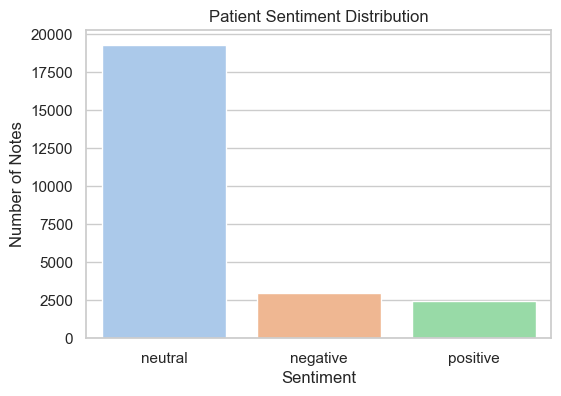

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Count of each sentiment
sentiment_counts = nlp_data['note.csv.gz']['sentiment'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="pastel")
plt.title("Patient Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Notes")
plt.show()


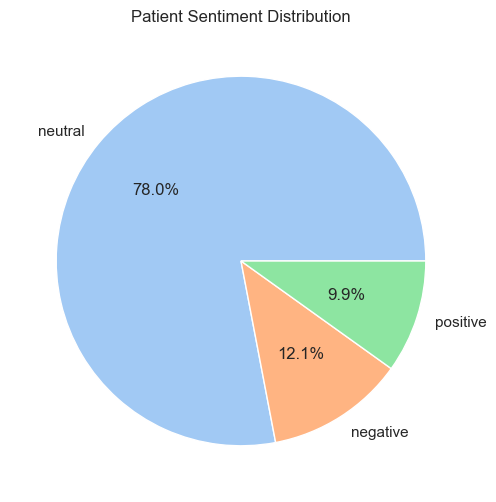

In [12]:
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Patient Sentiment Distribution")
plt.show()


Sentiment Analysis Use Case – Summary

Goal:
Capture patient experience from feedback/reviews to improve hospital services.

Loaded note.csv.gz from PhysioNet demo datasets.

Stored in nlp_data dictionary.

Text Exploration & Cleaning:

Identified the text column containing patient notes.

Cleaned text: removed extra spaces, ensured all entries are strings.

Sentiment Analysis:

Used VADER (unsupervised sentiment analyzer) to calculate sentiment scores.

Converted scores into labels: positive, negative, neutral.

Visualization:

Created bar chart and pie chart showing distribution of sentiments.

Visual summary highlights patient feedback trends.

Outcome:

Each patient note is now labeled with a sentiment.

You can analyze positive, negative, and neutral feedback.

Ready to integrate into the Health AI Suite for reporting or dashboard display.